In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler,MinMaxScaler

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LinearRegression,LogisticRegression

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,f1_score,auc,precision_recall_curve

In [2]:
churn_df = pd.read_csv("Telco-Customer-Churn.csv")
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [3]:
churn_df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


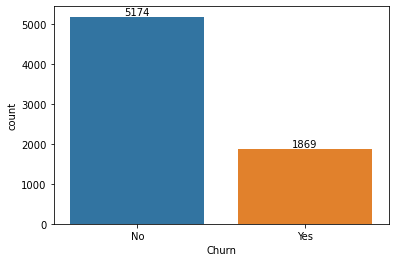

In [4]:
ax=sns.countplot(x='Churn', data=churn_df)
for container in ax.containers:
    ax.bar_label(container)

Task: Analyze the churn rate by categorical features in the given data DataFrame. 
    Create a bar plot for each categorical feature, showing the churn count for each category, with a figure size of (10, 4). 
    Add a title "Churn by {column}" to each plot, where {column} is the name of the categorical feature.

### Categorical features analysis

In [5]:
churn_df.select_dtypes(include='object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [6]:
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod']
print(f"Number of categorical features for our analysis {len(categorical_features)}")

Number of categorical features for our analysis 15


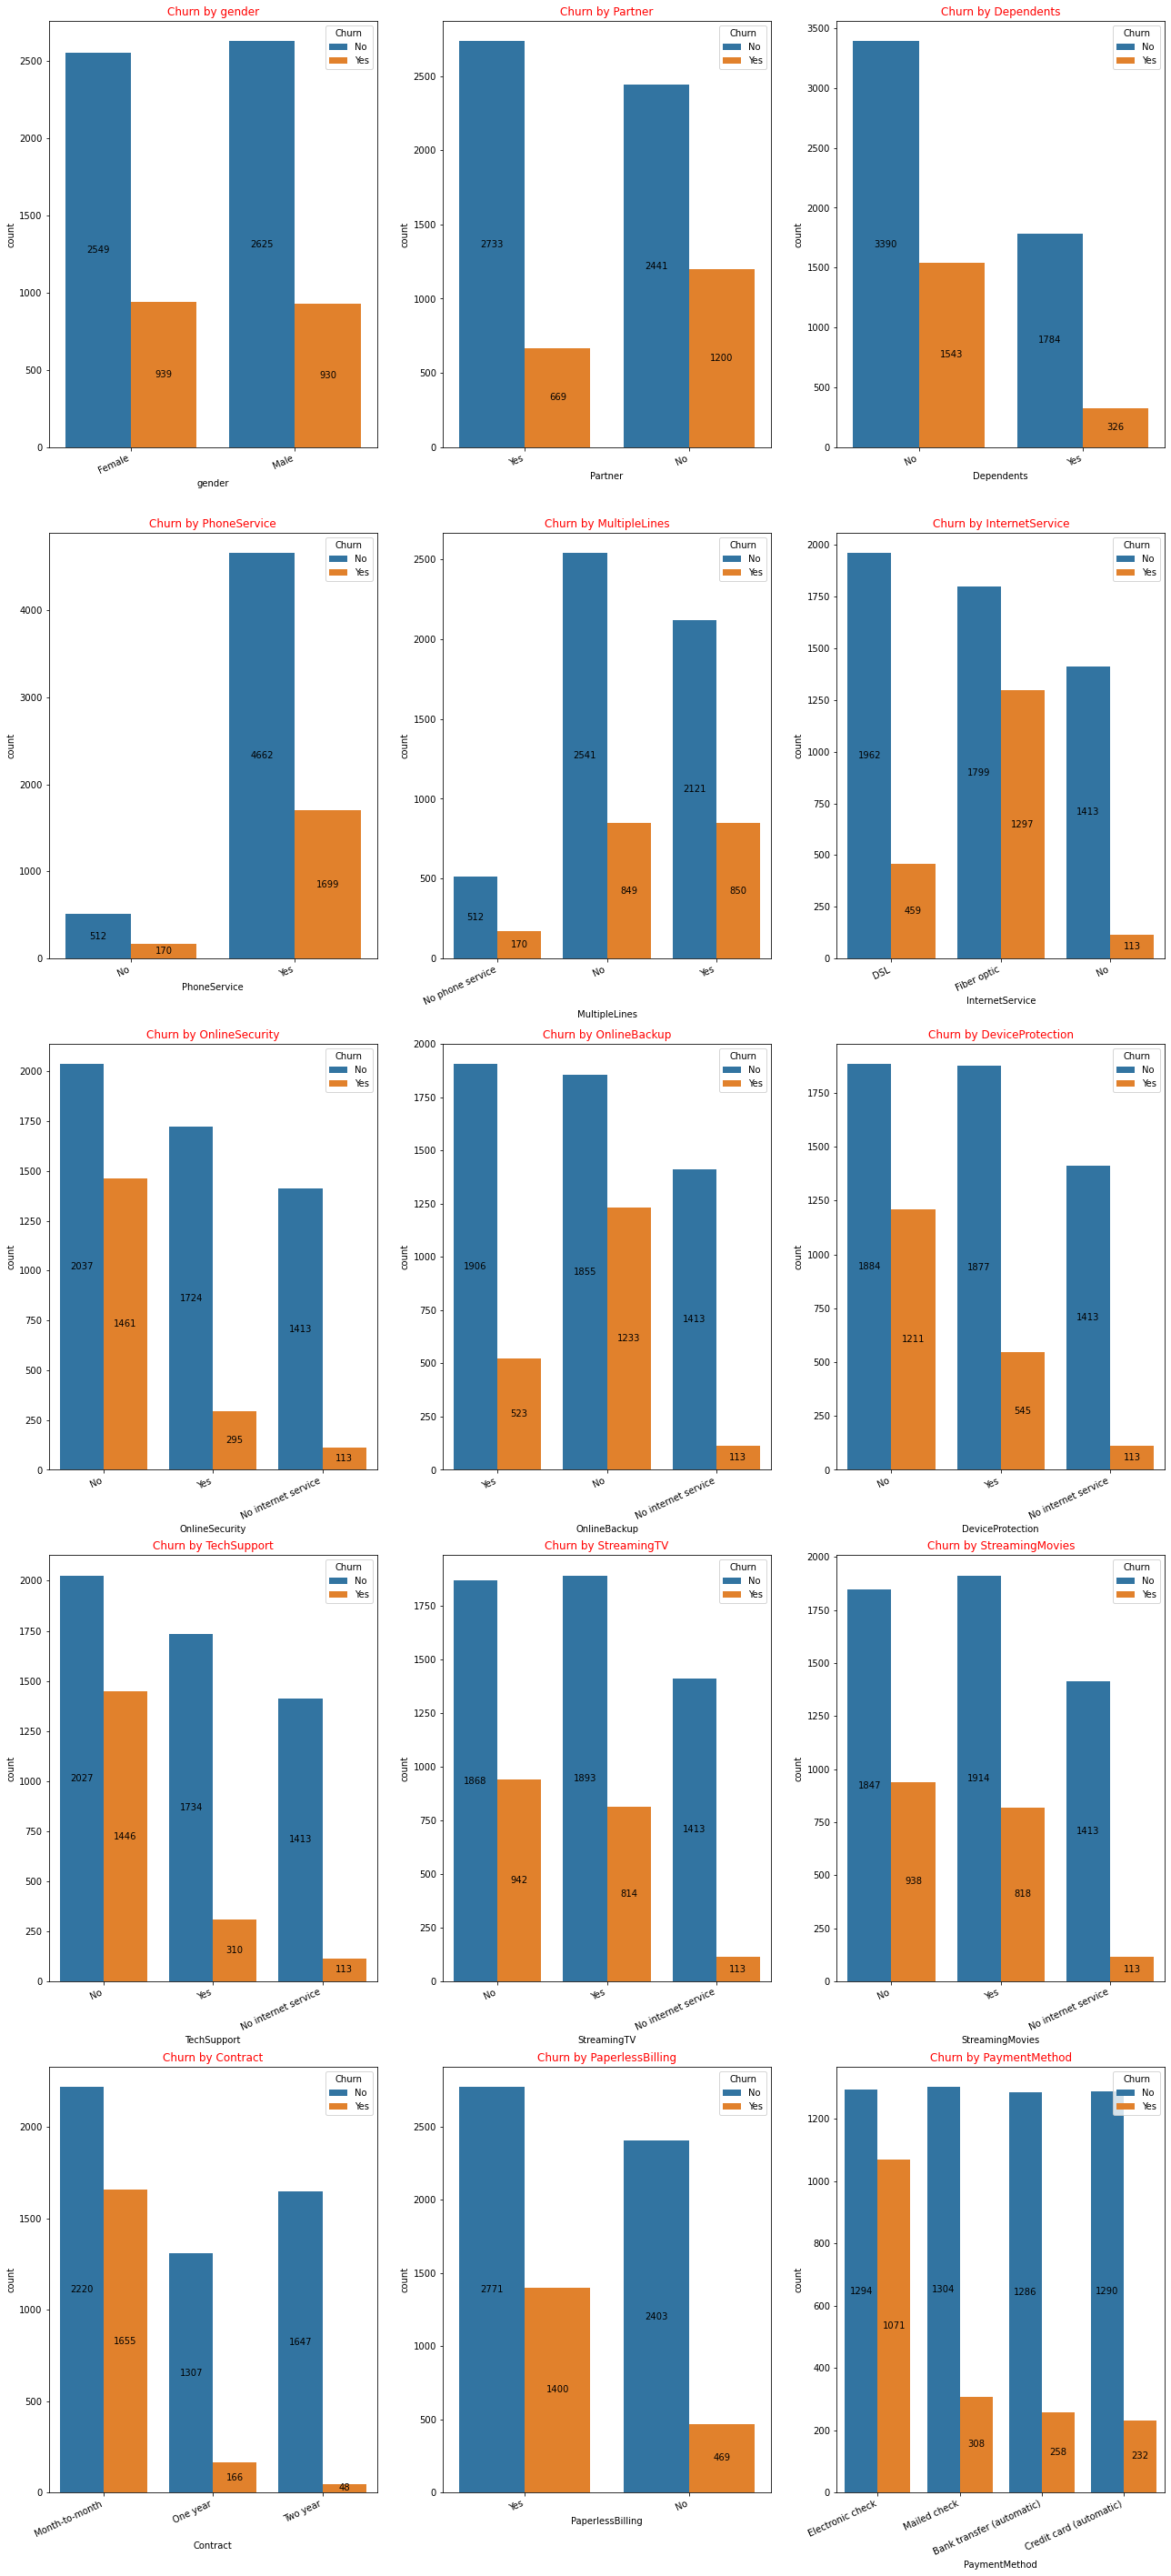

In [7]:
figure = plt.figure(figsize=(22,50))
n_rows = 5
n_cols = 3
i=0

for var in categorical_features:
    
    plt.subplot(n_rows,n_cols,i+1)
    ax = sns.countplot(x=var,hue='Churn',data=churn_df)
    
    ax.set_title(f"Churn by {var}",loc='center',fontdict ={'fontsize': 12,'color': 'red','verticalalignment': 'baseline','horizontalalignment': 'center'})
    for container in ax.containers:
        ax.bar_label(container,label_type ='center')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=25, horizontalalignment='right')
    
    i+=1

### Numeric variable Analysis

In [8]:
churn_df["TotalCharges"] = churn_df["TotalCharges"].apply(lambda x: np.float64(x) if x!="" and x!=" " else 0)

In [9]:
churn_df.select_dtypes(exclude='object').columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

### Numeric features analysis

In [10]:
churn_df["TotalCharges"].dtype

dtype('float64')

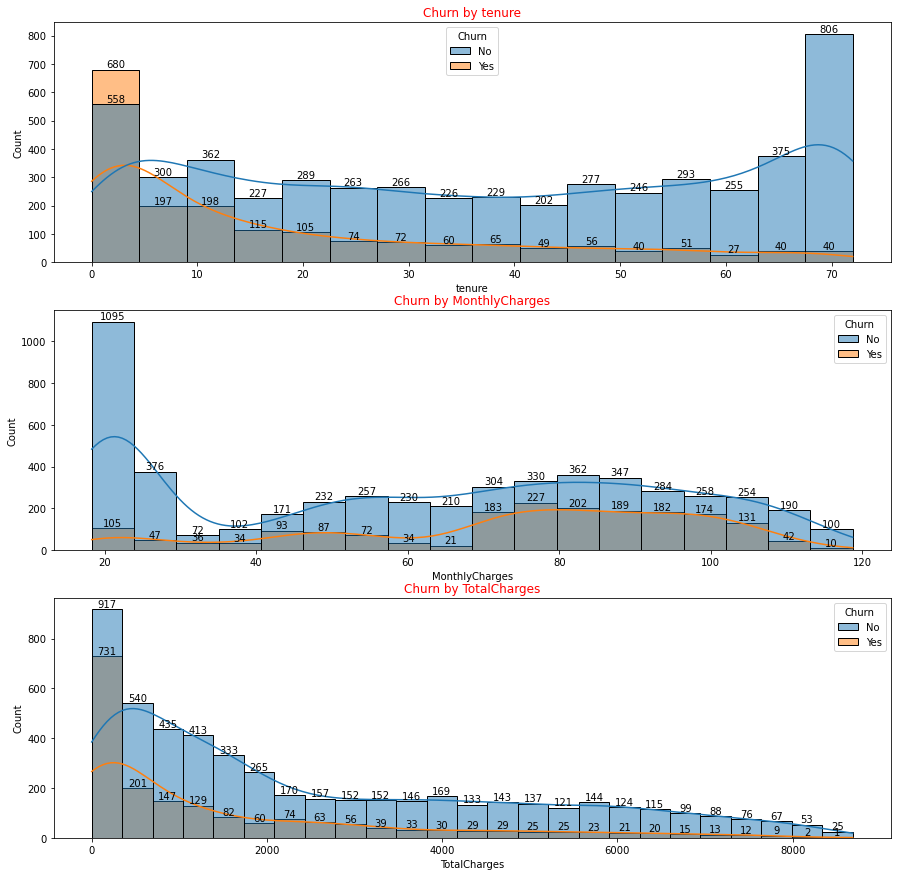

In [11]:
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
figure = plt.figure(figsize=(15,15))
n_rows = 3
n_cols = 1
i=0
for var in numeric_features:
    plt.subplot(n_rows,n_cols,i+1)
    ax = sns.histplot(x=var,data=churn_df,kde=True,hue="Churn")
    ax.set_title(f"Churn by {var}",loc='center',fontdict ={'fontsize': 12,'color': 'red','verticalalignment': 'baseline','horizontalalignment': 'center'})
    for container in ax.containers:
        ax.bar_label(container,label_type ='edge')
        
    i+=1

Task: Analyze the correlation between numeric features in the given data DataFrame. Create a heatmap to visualize the correlation matrix of the numeric features with a figure size of (8, 6). 
    Use the "coolwarm" color map and add a title "Correlation Matrix" to the plot.

## Numeric Features Correlation plot

Text(0.5, 1.0, 'Correlation Matrix')

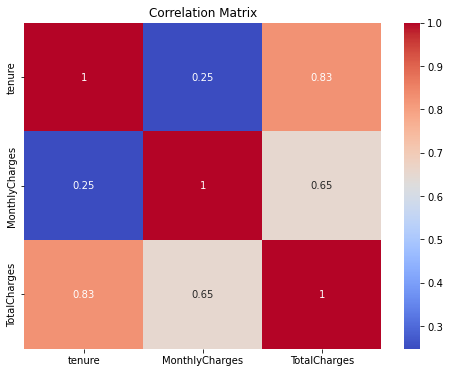

In [12]:
figure = plt.figure(figsize=(8,6))
ax = sns.heatmap(churn_df[numeric_features].corr(),annot=True,cmap="coolwarm")
ax.set_title("Correlation Matrix")

<Figure size 720x288 with 0 Axes>

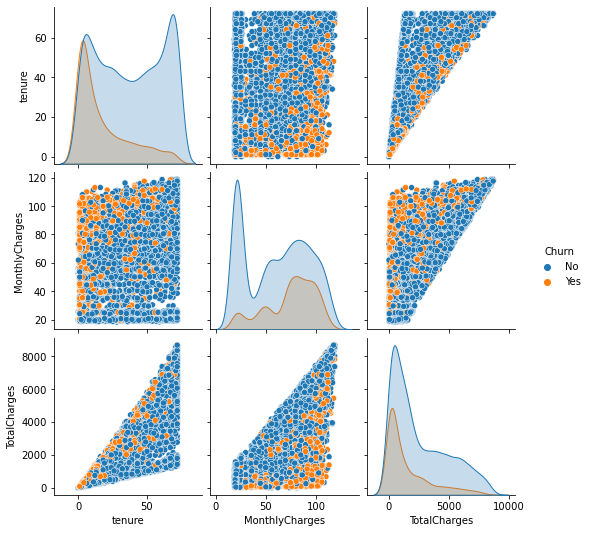

In [13]:
# Analyze the distribution of numeric features
plt.figure(figsize=(10, 4))
sns.pairplot(churn_df[[*numeric_features, 'Churn']], hue='Churn')
plt.show()

### One hot encoding the categorical features

In [14]:
ohe = OneHotEncoder()
categorical_features_encoded = ohe.fit_transform(churn_df[categorical_features]).toarray()
categorical_features_encoded_df = pd.DataFrame(categorical_features_encoded,columns=ohe.get_feature_names_out())

### Label encoding the numeric features

In [15]:
le = LabelEncoder()
target_encoded = le.fit_transform(np.array(churn_df["Churn"]).reshape(-1,1))
target_encoded_df = pd.DataFrame(target_encoded,columns=["Churn_encoded"])

C:\Users\nswet\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Standardising the data

In [16]:
sc = StandardScaler()
numeric_features_arr = sc.fit_transform(churn_df[numeric_features])
numeric_features_df = pd.DataFrame(numeric_features_arr,columns=numeric_features)

### Merge all the preprocessed columns

In [17]:
churn_df_new = pd.concat([numeric_features_df,categorical_features_encoded_df,target_encoded_df],axis=1)

In [18]:
churn_df_new.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Female',
       'gender_Male', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'PhoneService_No', 'PhoneService_Yes',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_

In [19]:
y = churn_df_new["Churn_encoded"]
X = churn_df_new.drop(["Churn_encoded"],axis=1)

## Train Test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)
print("Shape of X train",X_train.shape)
print("Shape of X test",X_test.shape)
print("Shape of y train",y_train.shape)
print("Shape of y test",y_test.shape)

Shape of X train (5634, 44)
Shape of X test (1409, 44)
Shape of y train (5634,)
Shape of y test (1409,)


### Stratified the y column while splitting

In [21]:
from collections import Counter
zero_class = np.round(Counter(y_train)[0]/(Counter(y_train)[0]+Counter(y_train)[1]),2)
one_class = np.round(Counter(y_train)[1]/(Counter(y_train)[0]+Counter(y_train)[1]),2)
print(f"Ration of 0 and 1 class in training dataset {zero_class}:{one_class}" )
zero_class = np.round(Counter(y_test)[0]/(Counter(y_test)[0]+Counter(y_test)[1]),2)
one_class = np.round(Counter(y_test)[1]/(Counter(y_test)[0]+Counter(y_test)[1]),2)
print(f"Ration of 0 and 1 class in testing dataset {zero_class}:{one_class}" )

Ration of 0 and 1 class in training dataset 0.73:0.27
Ration of 0 and 1 class in testing dataset 0.73:0.27


In [22]:
log_reg = LogisticRegression(random_state=24)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=24)

In [23]:
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



### Plot confusion Matrix

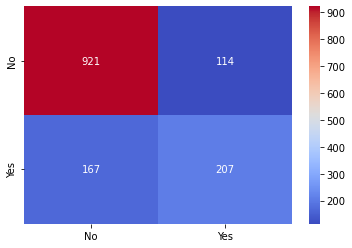

In [25]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g', 
            xticklabels=['No','Yes'],
            yticklabels=['No','Yes'],cmap="coolwarm")
plt.show()

In [26]:
TN = confusion_matrix(y_test,y_pred)[0,0]
TP = confusion_matrix(y_test,y_pred)[1,1]
FP = confusion_matrix(y_test,y_pred)[0,1]
FN = confusion_matrix(y_test,y_pred)[1,0]
total = TN+TP+FP+FN

In [27]:
accuracy = (TP+TN)/total
TP_rate = TP/(TP+FN)
TN_rate = TN/(TN+FP)
FP_rate = FP/(FP+TN)
FN_rate = FN/(FN+TP)
Precission_class1 = TP/(TP+FP)
Recall_class1 = TP/(TP+FN)
f1_score_class1 = 2*Precission_class1*Recall_class1/(Precission_class1+Recall_class1)

Precission_class0 = TN/(TN+FN)
Recall_class0 = TN/(TN+FP)
f1_score_class0 = 2*Precission_class0*Recall_class0/(Precission_class0+Recall_class0)

In [28]:
print("Accuracy:",np.round(accuracy,2))
print("***Precission and Recall of Class 1***")
print("Precission of Class1:",np.round(Precission_class1,2))
print("Recall of Class1:",np.round(Recall_class1,2))
print("f1_score of Class1:",np.round(f1_score_class1,2))
print("\n")
print("***Precission and Recall of Class 0***")
print("Precission of Class0:",np.round(Precission_class0,2))
print("Recall of Class0:",np.round(Recall_class0,2))
print("f1_score of Class0:",np.round(f1_score_class0,2))

Accuracy: 0.8
***Precission and Recall of Class 1***
Precission of Class1: 0.64
Recall of Class1: 0.55
f1_score of Class1: 0.6


***Precission and Recall of Class 0***
Precission of Class0: 0.85
Recall of Class0: 0.89
f1_score of Class0: 0.87


In [29]:
def plot_roc_auc_pr_curves(y_true,y_pred_prob,label,f1_score):
    fig = plt.figure(figsize=(14,4))
    plt.subplot(1,2,1)
    fpr, tpr, th = roc_curve(y_true,y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='r', lw=2, linestyle='--',label='No Skill')
    plt.plot(fpr, tpr,marker='.', color= 'b',lw=2, label= label +'(AUC = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")
        
    plt.subplot(1,2,2)
    # calculate the no skill line as the proportion of the positive class
    global y
    no_skill = len(y[y==1]) / len(y)
    # plot the no skill precision-recall curve
    plt.plot([0, 1], [no_skill, no_skill], color='r', lw=2, linestyle='--', label='No Skill:'+str(np.round(no_skill,2)))
    # calculate model precision-recall curve
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred_prob)
    #create precision recall curve
    plt.plot(recall, precision, marker='.', color= 'g',lw=2, label= label +'(F1-score = %0.2f)' % f1_score)
    plt.xlim([0.0, 1])
    plt.ylim([0.0, 1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall curve') #Precission Recall Curve  
    plt.legend(loc="lower right")
    
    fig.suptitle('Performance of '+'"'+label+'"'+' Model', fontsize=16)
    #display plot
    plt.show()

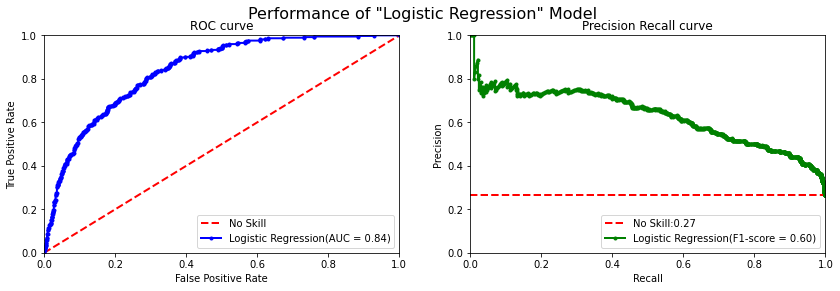

In [30]:
plot_roc_auc_pr_curves(y_test,y_prob[:,1],"Logistic Regression",f1_score(y_test,y_pred))

In [31]:
# Custom parameter grid
param_grid_log_reg = [
    {'penalty': ['l1'],
     'solver': ['liblinear', 'saga'], #these solvers support L1 regularisation
     'C': [0.001, 0.01, 0.1, 1, 10],
     'max_iter': [1000, 5000],
     'class_weight': [None]
    },
    {'penalty': ['l2'],
     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  #these solvers support L2 regularisation
     'C': [ 1, 10, 20, 50],
     'max_iter': [1000, 5000],
     'class_weight': [None]
    },
    {'penalty': ['elasticnet'], #this solvers support elasticnet regularisation
     'solver': ['saga'],
     'C': [0.001, 0.01, 0.1, 1, 10, 50],
     'max_iter': [1000, 5000],
     'class_weight': [None],
     'l1_ratio': [0, 0.3, 0.5, 0.7, 1]
    }
]

### Imporvising the models performance by HyperparameterTuning

In [ ]:
grid_search= GridSearchCV(log_reg,param_grid=param_grid_log_reg,scoring='f1',n_jobs=-1,cv=5)
grid_search.fit(X_train,y_train)

In [ ]:
grid_search_df=pd.DataFrame(grid_search.cv_results_)
grid_search_df.to_excel("1_Log_reg_Gridsearch_results.xlsx")

## Choose best model after looking at the grid search results
{'C': 50, 'class_weight': None, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
print("Best Model Parameters:",grid_search.best_params_)

In [ ]:
best_log_reg_model = LogisticRegression(random_state=24,C= 50, class_weight= None, max_iter= 1000, penalty='l2', solver= 'lbfgs')
best_log_reg_model.fit(X_train,y_train)

In [ ]:
y_pred_best = best_log_reg_model.predict(X_test)
y_prob_best = best_log_reg_model.predict_proba(X_test)

In [ ]:
accuracy = accuracy_score(y_test,y_pred_best)
accuracy

In [ ]:
print(classification_report(y_test,y_pred_best))

In [ ]:
plot_roc_auc_pr_curves(y_test,y_prob_best[:,1],"Logistic Regression",f1_score(y_test,y_pred_best))